Data Collection:


The following datasets were generated by merging thyroid disease datasets available in the UCI Machine Learning Repository.
https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data
The Kaggle dataset contains a file called "hypothyroid.csv" with a size of 3773 observations and 30 attributes. 
Here is a summary of the attribute descriptions:

age: The age of the patient (integer)
sex: The gender identity of the patient (string)
on_thyroxine: Indicates whether the patient is on thyroxine medication (boolean)
query on thyroxine: Indicates whether the patient has a query about thyroxine medication (boolean)
on antithyroid meds: Indicates whether the patient is on antithyroid medication (boolean)
sick: Indicates whether the patient is sick (boolean)
pregnant: Indicates whether the patient is pregnant (boolean)
thyroid_surgery: Indicates whether the patient has undergone thyroid surgery (boolean)
I131_treatment: Indicates whether the patient is undergoing I131 treatment (boolean)
query_hypothyroid: Indicates whether the patient believes they have hypothyroidism (boolean)
query_hyperthyroid: Indicates whether the patient believes they have hyperthyroidism (boolean)
lithium: Indicates whether the patient is taking lithium medication (boolean)
goitre: Indicates whether the patient has goitre (enlarged thyroid gland) (boolean)
tumor: Indicates whether the patient has a tumor (boolean)
hypopituitary: Indicates the condition of the patient's hyperpituitary gland (float)
psych: Indicates whether the patient has a psychological condition (boolean)
TSH_measured: Indicates whether TSH (thyroid-stimulating hormone) was measured in the blood (boolean)
TSH: The TSH level in the blood from laboratory work (float)
T3_measured: Indicates whether T3 (triiodothyronine) was measured in the blood (boolean)
T3: The T3 level in the blood from laboratory work (float)
TT4_measured: Indicates whether TT4 (thyroxine) was measured in the blood (boolean)
TT4: The TT4 level in the blood from laboratory work (float)
T4U_measured: Indicates whether T4U (thyroxine uptake) was measured in the blood (boolean)
T4U: The T4U level in the blood from laboratory work (float)
FTI_measured: Indicates whether FTI (free thyroxine index) was measured in the blood (boolean)
FTI: The FTI level in the blood from laboratory work (float)
TBG_measured: Indicates whether TBG (thyroxine-binding globulin) was measured in the blood (boolean)
TBG: The TBG level in the blood from laboratory work (float)
referral_source: The source from which the patient was referred (string)
target: The medical diagnosis of hyperthyroidism (string)

In [447]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
sns.set()

In [449]:
data_set = pd.read_csv(r'C:\Users\Dinesh Chalicheemala\Downloads\hypothyroid.csv')

In [450]:
data_set.shape

(3772, 30)

In [451]:
data_set.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


Problem Statement : To build a classification methodology to predict the type of Thyroid a person has based on the below features.

age - Age of the person
sex - Male or Female
on_thyroxine - true or false
on_antithyroid_medication - true or false
sick - true or false
pregnant - true or false
thyroid_surgery - true or false
I131_treatment - true or false
query_hypothyroid - true or false
query_hyperthyroid -true or false
lithium - true or false
goitre - true or false
tumor - true or false
hypopituitary- true or false
psych - true or false
TSH_measured - true or false
TSH - thyroid stimulating hormone floating value
T3_measured - true or false
T3 - triiodothyronine value
TT4_measured- true or false
TT4 - Thyroxine value
T4U_measured- true or false
T4U - numerical value
FTI_measured- true or false
FTI -Free Thyroxine Index
TBG_measured- true or false
TBG -Thyroid-Binding Globulin value
referral_source - different sources of referals
Class - different types of thyroid

In [452]:
data_set.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


Although the data description initially suggests that there are no missing values in the dataset, further examination reveals that missing values are actually represented by invalid values such as '?'. To address this, we will replace these invalid values with 'nan' (a standard representation for missing values) and then recheck the dataset for missing values.

In [453]:
for column in data_set.columns:
    count = data_set[column][data_set[column]=='?'].count()
    if count!=0:
        print(column, data_set[column][data_set[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


The dataset contains columns with missing values represented by '?'. To handle these missing values, we will replace the '?' with 'nan' to standardize the representation. After replacing the missing values, we will perform imputation to fill in the missing values with appropriate values.
Additionally, the column 'TBG' has all missing values. As this column provides no useful information, we will drop it from the dataset.

In [454]:
data_set = data_set.drop(['TBG'],axis =1)

Upon inspecting the dataset, we can observe that certain columns with 'true' and 'false' values serve as indicators of whether the subsequent column contains meaningful values or not. Let's consider an example to illustrate this further.

In [455]:
data_set[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


Since our goal is to handle missing values in the dataset, it is unnecessary to retain columns that serve as indicators for whether the subsequent columns have values or not. Therefore, we will drop these indicator columns from our dataset

In [456]:
data_set = data_set.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [457]:
# Now replace '?' values with numpy nan
for column in data_set.columns:
    count = data_set[column][data_set[column]=='?'].count()
    if count!=0:
        data_set[column] = data_set[column].replace('?',np.nan)  

In [458]:
for column in data_set.columns:
    count = data_set[column][data_set[column]=='?'].count()
    if count==0:
        print(column, data_set[column][data_set[column]=='?'].count())  

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Now that we have replaced all the invalid values with 'nan', we can proceed with handling the missing values in the dataset.

In [459]:
data_set.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Given that the values in the dataset are categorical, we need to convert them into numerical form before applying any imputation techniques. To achieve this, we can use different approaches depending on the number of distinct categories in each column.
For columns with only two distinct categories, instead of using one-hot encoding (get dummies), we can utilize mapping. This is because using get dummies in such cases would result in two highly correlated columns, as both columns would essentially represent the same information. Consequently, we would need to drop one of the columns. By using mapping, we can assign numerical values directly to the two categories, avoiding the issue of correlated columns.
On the other hand, for columns with more than two distinct categories, we will employ one-hot encoding (get dummies) to create separate binary columns for each category. This approach allows us to capture the information contained within these categorical variables.
By employing mapping for columns with two categories and get dummies for columns with more than two categories, we can effectively handle the conversion of categorical values to numerical form while mitigating the issue of correlated columns.

In [460]:
# for column in data_set.columns:
#     print(column, (data_set[column].unique()))

In [461]:
# We can map the categorical values like below:
data_set['sex'] = data_set['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for column in data_set.columns:
    if  len(data_set[column].unique())==2:
        data_set[column] = data_set[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories.

In [462]:
data_set['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [463]:
# we will use get_dummies with that.
data_set = pd.get_dummies(data_set, columns=['referral_source'])

Since our output class contains four distinct categories, using one-hot encoding (get dummies) is not appropriate in this case. Instead, we will use the LabelEncoder function to map the categories of the output class to numerical values. The LabelEncoder function assigns a unique numerical label to each category, allowing us to represent the output class in a numerical format.

In [464]:
data_set['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [465]:
lblEn = LabelEncoder()

data_set['Class'] =lblEn.fit_transform(data_set['Class'])

In [466]:
data_set.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0


In [467]:
data_set.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3003,3541,3385,3387,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69,241,146,234,NaN,NaN,NaN,NaN,NaN,NaN
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,101,0.99,100,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,238,71,95,73,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,NaN,NaN,NaN,NaN,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,NaN,NaN,NaN,NaN,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [468]:
# for column in data_set.columns:
#     print(column, (data_set[column].unique()))

Now that we have encoded all the categorical values in our dataset, we can proceed with the next step, which is imputing the missing values.

In [469]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data_set) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data_set=pd.DataFrame(data=np.round(new_array), columns=data_set.columns)

In [470]:
new_data_set.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.026776,108.459438,1.020944,110.301166,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.785086,34.838114,0.165546,32.145618,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [471]:
new_data_set.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

After applying the imputation techniques, we have successfully addressed and filled in all the missing values in our dataset. As a result, there are no longer any missing values present in our updated dataset.

We will now examine the distribution of the continuous data present in the dataset.


C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

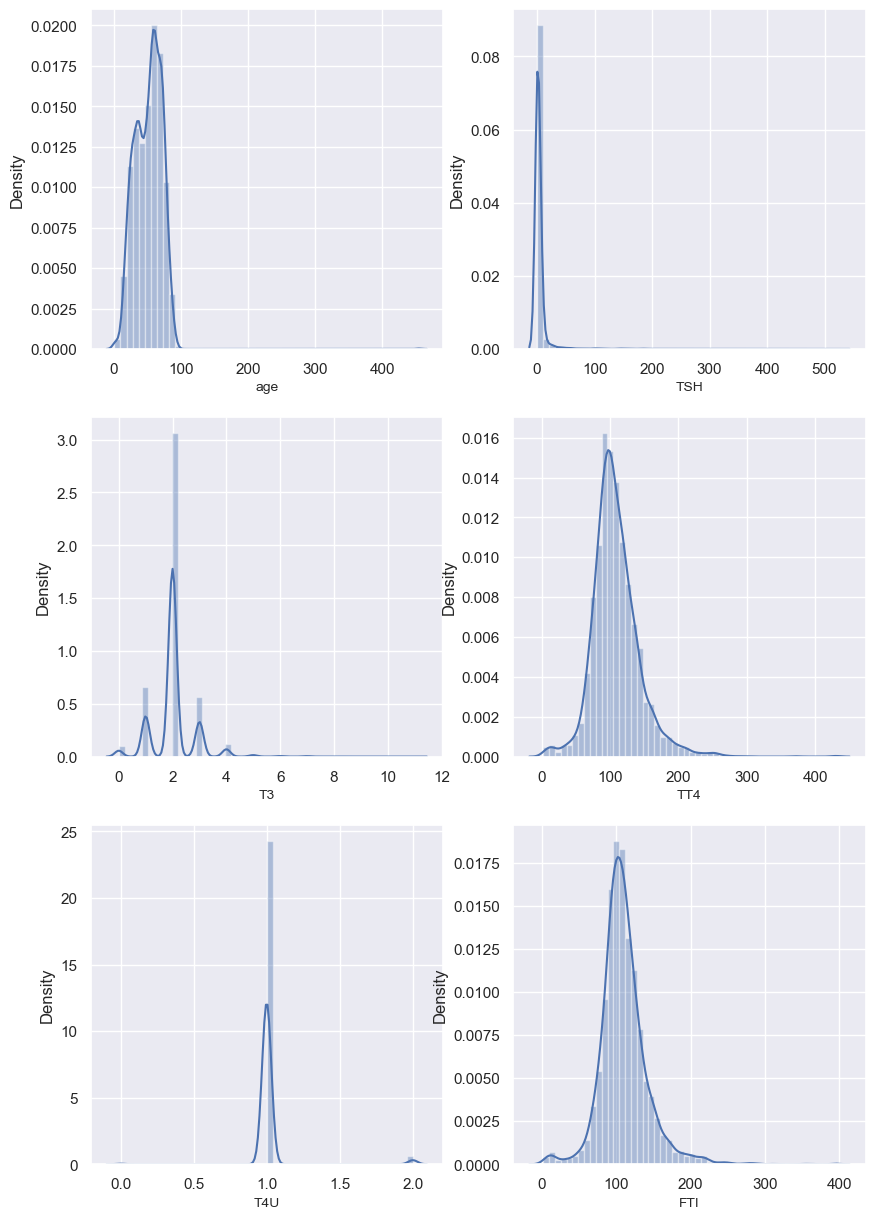

In [472]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(new_data_set[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

To address the left-skewness observed in the distribution plots of the 'age', 'TSH', and 'T3' columns, we can apply a log transformation to the data. However, before performing the log transformation, it is necessary to handle the scenario where the values are equal to zero, as the logarithm of zero is undefined.

To handle this, we can add 1 to each value in the respective columns. By adding 1, we ensure that all values are greater than zero, enabling us to safely apply the log transformation.

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

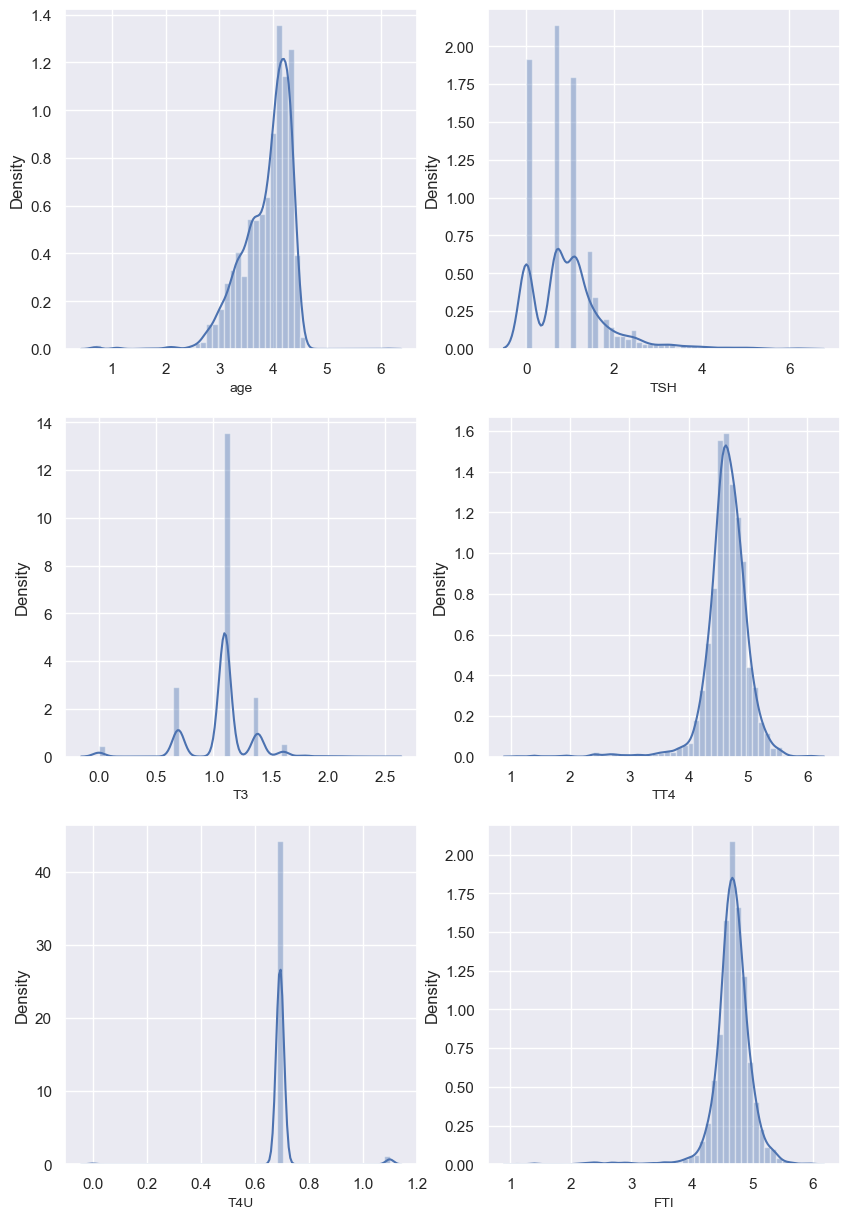

In [473]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data_set[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data_set[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

After applying the log transformation to the columns in the dataset, most of the columns show improved distributions. However, the 'TSH' column still exhibits an unusual trend even after the transformation. As it doesn't provide significant information, we can safely drop the 'TSH' column from our dataset.




In [474]:
new_data_set = new_data_set.drop(['TSH'],axis=1)

Let's examine the balance of our dataset in terms of the distribution of target classes

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

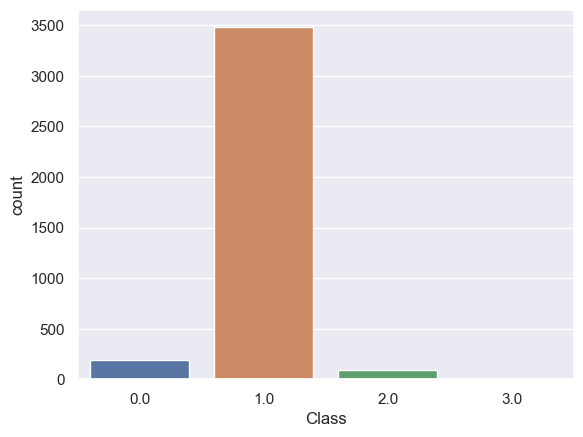

In [475]:
# let's see how data is distributed for every column for every individual id
# the graph plot below is for individual ids. Press 1 in the  input box below the graph to continue viewing graph for each id!!

# plot.figure(figsize=(20,25), facecolor='white')
# plotnumber = 1
# plt_data = data.drop(['age'], axis =1)

# for column in plt_data:
#     ax = plot.subplot(6,5,plotnumber)
#     sns.countplot(plt_data[column])
#     plot.xlabel(column,fontsize=10)
#     plotnumber+=1
# plot.show()


sns.countplot(new_data_set['Class'])

The dataset exhibits a significant class imbalance, where certain target classes are heavily underrepresented compared to others. To address this issue, we can utilize the Python library called "imbalanced-learn." This library provides various algorithms and techniques specifically designed for handling imbalanced data.

One of the algorithms available in imbalanced-learn is called RandomOverSampler. This algorithm aims to balance the class distribution by randomly oversampling the minority class samples, increasing their representation in the dataset.

By applying the RandomOverSampler algorithm from imbalanced-learn, we can effectively handle the imbalanced nature of our dataset and create a more balanced representation of the target classes.

In [476]:
# cat = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# sm = SMOTENC(categorical_features = cat,sampling_strategy='minority',k_neighbors=3)

In [477]:
# kmsmote=KMeansSMOTE()

In [478]:
x = new_data_set.drop(['Class'], axis=1)
y = new_data_set['Class']
rdsmple = RandomOverSampler()
x_sample, y_sample = rdsmple.fit_resample(x, y)

In [479]:
# x_sampled,y_sampled = kmsmote.fit_sample(x,np.asarray(y))

In [480]:
from imblearn.over_sampling import RandomOverSampler

rdsmple = RandomOverSampler()
x_sample, y_sample = rdsmple.fit_resample(x, y)


In [481]:
x_sample.shape

(13924, 25)

In [482]:
x_sample = pd.DataFrame(data = x_sample, columns = x.columns)

In [483]:
x_sample

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

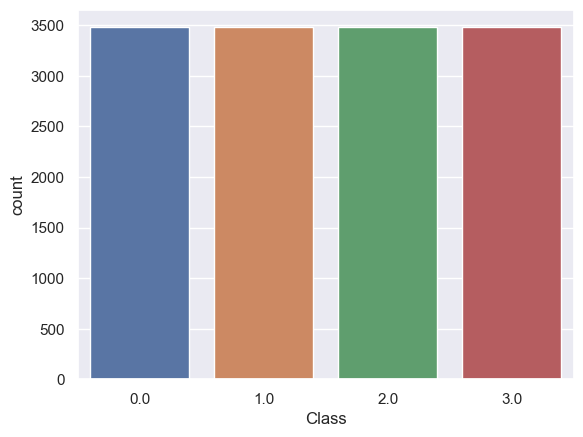

In [484]:
sns.countplot(y_sample) 

With the dataset now balanced after applying random oversampling, we can proceed to train our model using this data.

# Data Visualization

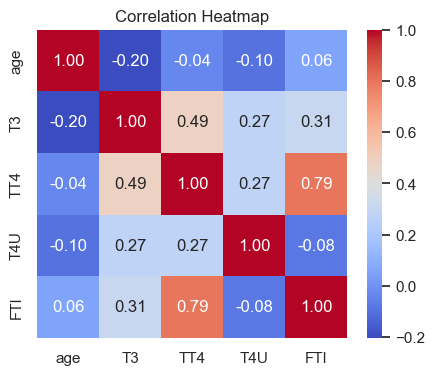

In [485]:
import matplotlib.pyplot as plt
numerical_cols = ['age', 'T3', 'TT4', 'T4U', 'FTI']

# Correlation matrix
corr = new_data_set[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1. age does not have significant correlation with the other numerical variables.
2. T3 and TT4 have a moderate positive correlation of 0.49.
3. TT4 and FTI have a strong positive correlation of 0.79.
4. T4U has a slight negative correlation with age and FTI.
3. Despite these correlations, further investigation is required to establish any causal relationships, as correlation does not imply causation.

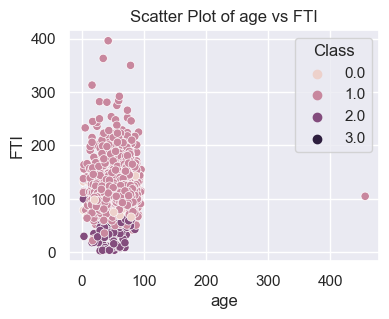

In [486]:
# Scatter plot of 'age' vs 'FTI'
plt.figure(figsize=(4, 3))
sns.scatterplot(data=new_data_set, x='age', y='FTI', hue='Class')
plt.title('Scatter Plot of age vs FTI')
plt.xlabel('age')
plt.ylabel('FTI')
plt.show()

The scatter plot illustrates the relationship between the age and Free Thyroxine Index (FTI) of patients, categorized by their class labels (hypothyroid condition).

From the scatter plot, we can observe that:
1. For all classes, the FTI values seem to be widely distributed across different age groups, without a clear pattern of correlation between age and FTI.
2. Most data points are concentrated in the class labeled as 1.0, which corresponds to the negative class (no hypothyroid condition) in the dataset.
3. Other classes (0.0, 2.0, and 3.0) have fewer data points, reflecting the imbalance in the class distribution.

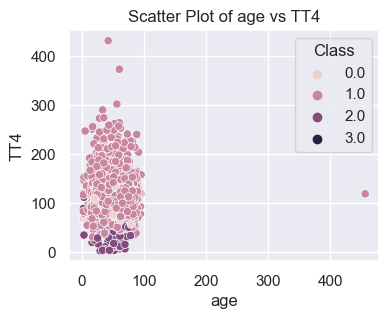

In [487]:
# Scatter plot of 'age' vs 'TT4'
plt.figure(figsize=(4, 3))
sns.scatterplot(data=new_data_set, x='age', y='TT4', hue='Class')
plt.title('Scatter Plot of age vs TT4')
plt.xlabel('age')
plt.ylabel('TT4')
plt.show()


The scatter plot shows the relationship between the age and Thyroxine (TT4) levels of patients, categorized by their class labels (hypothyroid condition).

From the scatter plot, we can observe that:
1. For all classes, the TT4 values seem to be widely distributed across different age groups, without a clear pattern of correlation between age and TT4.
2. Most data points are concentrated in the class labeled as 1.0, which corresponds to the negative class (no hypothyroid condition) in the dataset.
3. Other classes (0.0, 2.0, and 3.0) have fewer data points, reflecting the imbalance in the class distribution.

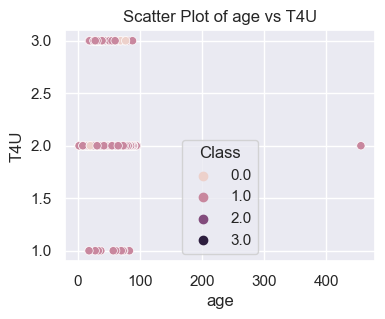

In [488]:
# Scatter plot of 'age' vs 'T4U'
plt.figure(figsize=(4, 3))
sns.scatterplot(data=new_data_set, x='age', y='T4U', hue='Class')
plt.title('Scatter Plot of age vs T4U')
plt.xlabel('age')
plt.ylabel('T4U')
plt.show()

The scatter plot illustrates the relationship between the age and Thyroxine Utilization (T4U) of patients, categorized by their class labels (hypothyroid condition).

From the scatter plot, we can observe that:
1. For all classes, the T4U values seem to be widely distributed across different age groups, without a clear pattern of correlation between age and T4U.
2. Most data points are concentrated in the class labeled as 1.0, which corresponds to the negative class (no hypothyroid condition) in the dataset.
3. Other classes (0.0, 2.0, and 3.0) have fewer data points, reflecting the imbalance in the class distribution.

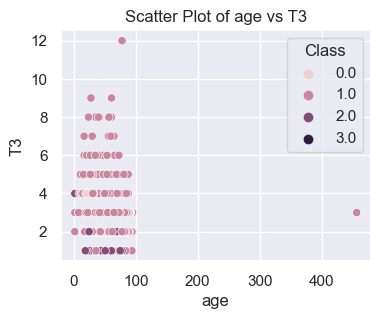

In [489]:
# Scatter plot of 'age' vs 'T3'
plt.figure(figsize=(4, 3))
sns.scatterplot(data=new_data_set, x='age', y='T3', hue='Class')
plt.title('Scatter Plot of age vs T3')
plt.xlabel('age')
plt.ylabel('T3')
plt.show()

The scatter plot illustrates the relationship between the age and Triiodothyronine (T3) levels of patients, categorized by their class labels (hypothyroid condition).

From the scatter plot, we can observe that:
1. For all classes, the T3 values seem to be widely distributed across different age groups, without a clear pattern of correlation between age and T3.
2. Most data points are concentrated in the class labeled as 1.0, which corresponds to the negative class (no hypothyroid condition) in the dataset.
3. Other classes (0.0, 2.0, and 3.0) have fewer data points, reflecting the imbalance in the class distribution.

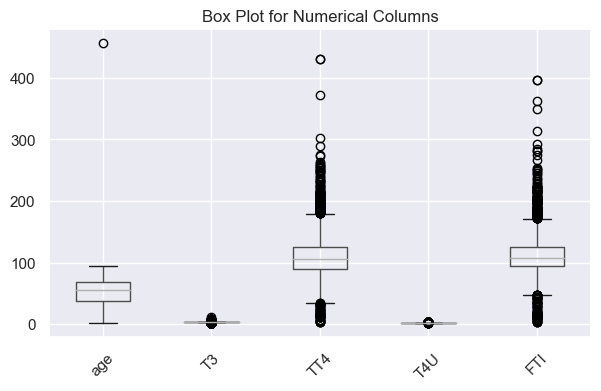

In [490]:
# Box plot for numerical columns
plt.figure(figsize=(7, 4))
new_data_set.boxplot(column=numerical_cols)
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

Key observations from the box plot:

1. 'age' seems to have a relatively symmetric distribution with a median around 50 and minimal outliers.

2.  'T3', 'TT4', 'T4U' and  'FTI' all have many outliers, particularly on the high end, suggesting some patients   have very high values for these measures.

3. The distributions of  'T3', 'TT4', 'T4U', 'FTI' are heavily skewed to the right, with most of the data concentrated on the lower end and a long tail stretching towards higher values.

# Model Exploration and Model Selection

In [491]:
#combining the data and keeping it 
combined_data = pd.concat([x_sample, y_sample], axis=1)
combined_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0


<AxesSubplot:>

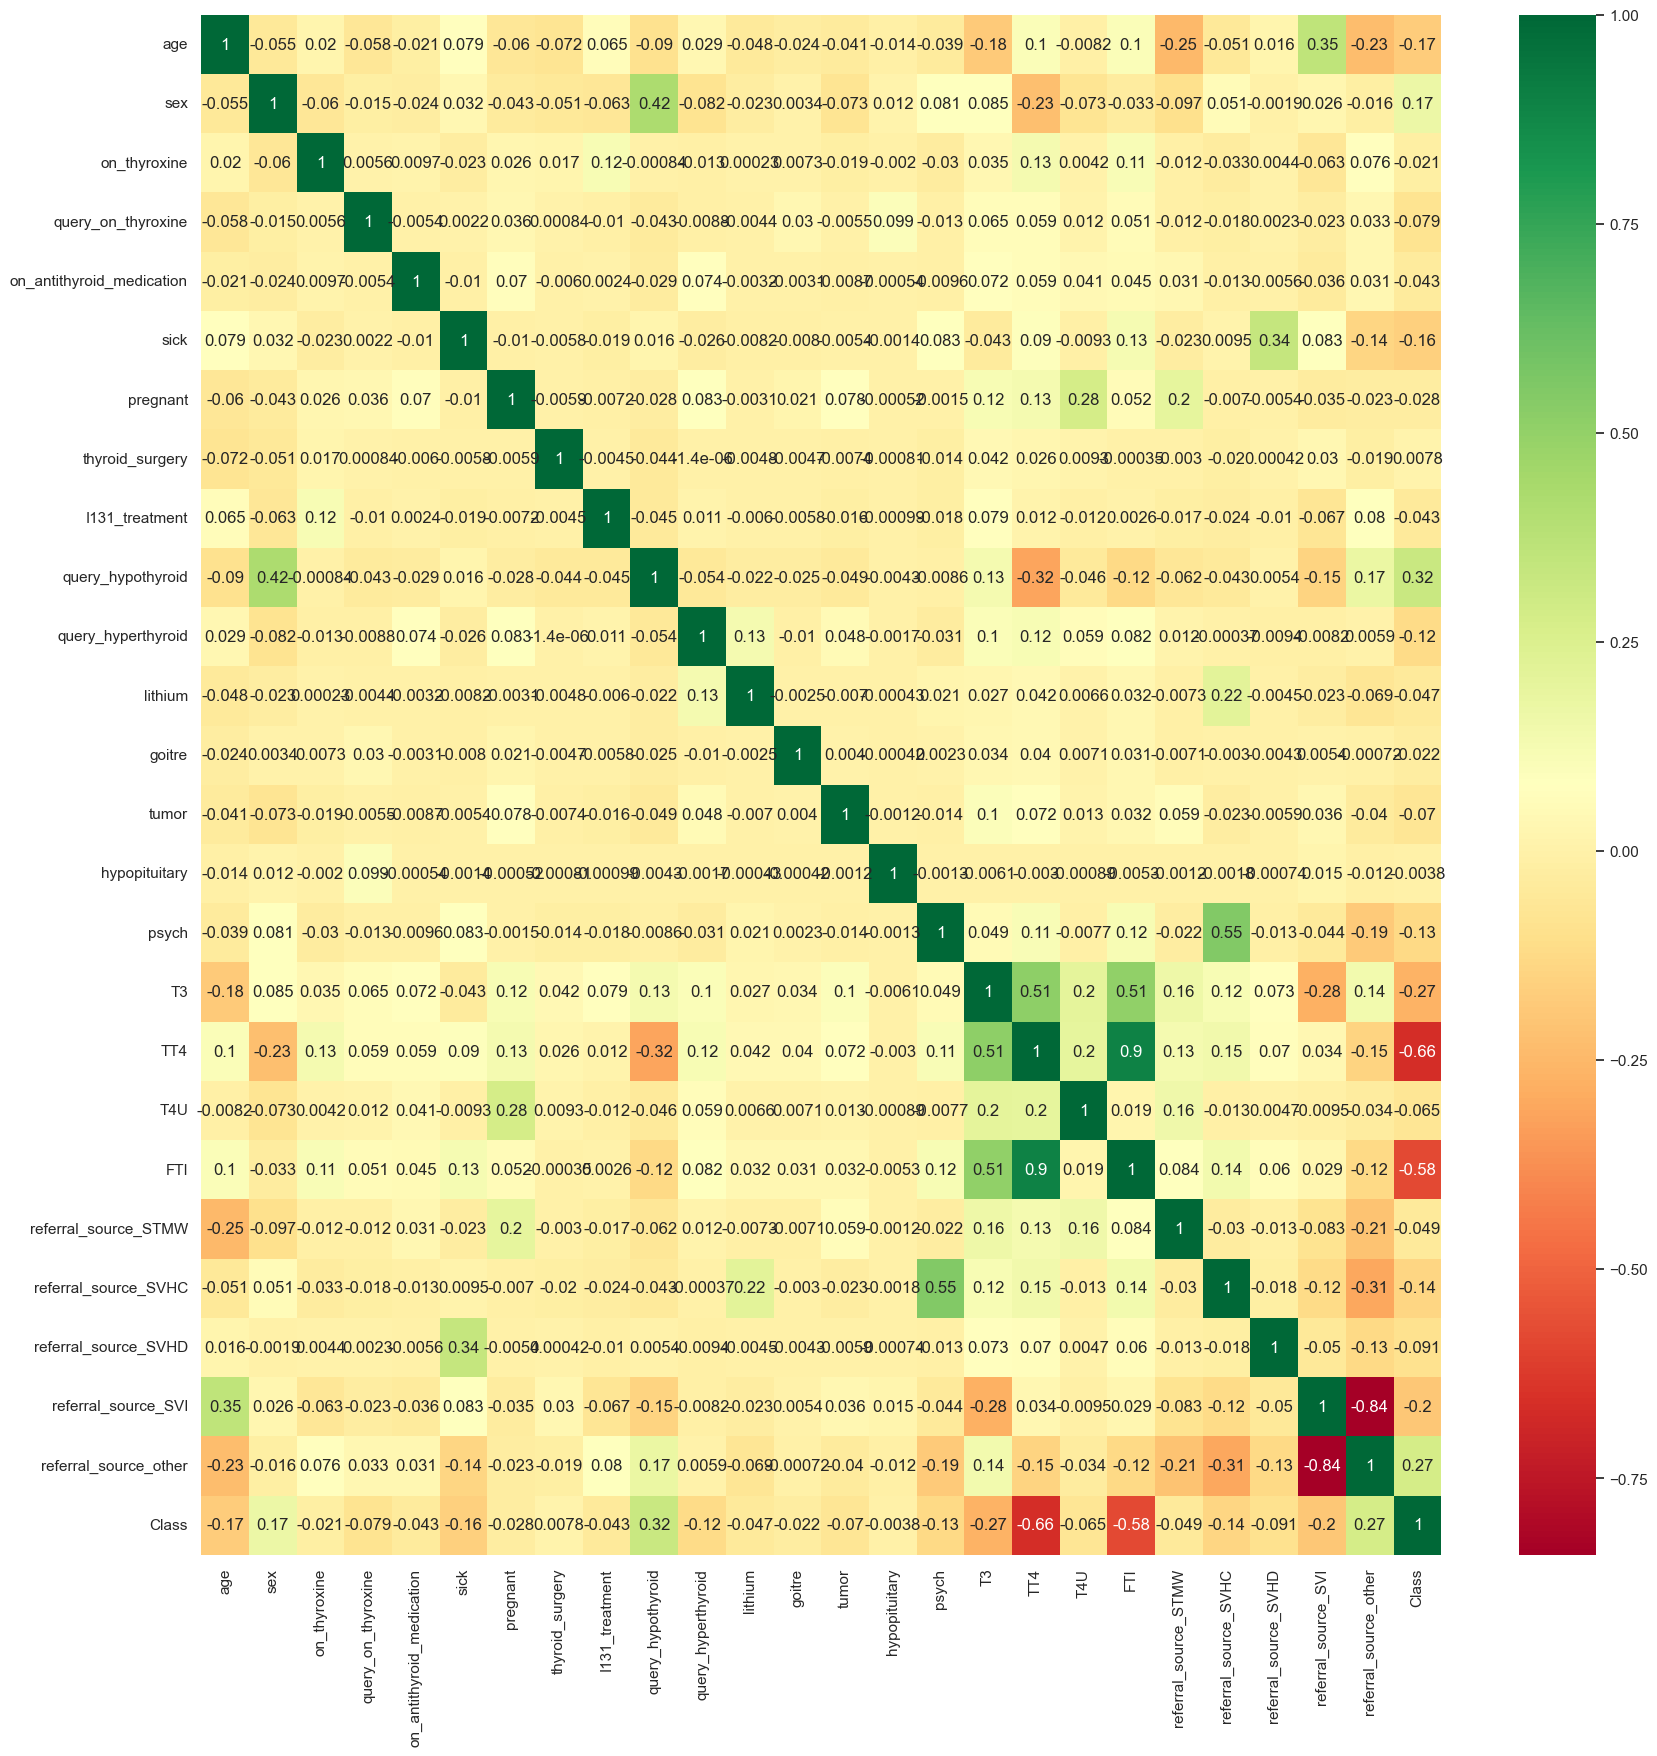

In [492]:
#get correlations of each features in dataset
corrmat = combined_data.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(combined_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see target class is negatively corelated with TT4 and FTI

In [493]:
combined_data.corr()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Class
age,1.000000,-0.054842,0.019944,-0.058309,-0.021311,0.078975,-0.059914,-0.072445,0.064624,-0.090427,...,-0.183136,0.102820,-0.008192,0.103909,-0.250700,-0.051125,0.016195,0.354234,-0.233332,-0.174977
sex,-0.054842,1.000000,-0.059532,-0.015319,-0.024284,0.031775,-0.042532,-0.050814,-0.063174,0.424204,...,0.084915,-0.226819,-0.073193,-0.032725,-0.097109,0.051293,-0.001875,0.025797,-0.016091,0.170845
on_thyroxine,0.019944,-0.059532,1.000000,0.005571,0.009734,-0.022860,0.026257,0.017394,0.117187,-0.000839,...,0.034782,0.133964,0.004176,0.109496,-0.012266,-0.032642,0.004447,-0.063491,0.075782,-0.021363
query_on_thyroxine,-0.058309,-0.015319,0.005571,1.000000,-0.005432,0.002240,0.035948,0.000837,-0.010000,-0.042962,...,0.064809,0.058755,0.012422,0.050613,-0.012334,-0.017821,0.002250,-0.023466,0.032738,-0.079104
on_antithyroid_medication,-0.021311,-0.024284,0.009734,-0.005432,1.000000,-0.010293,0.069783,-0.006048,0.002398,-0.029110,...,0.072255,0.058612,0.041078,0.045483,0.030970,-0.013248,-0.005566,-0.036407,0.031075,-0.042628
sick,0.078975,0.031775,-0.022860,0.002240,-0.010293,1.000000,-0.010013,-0.005769,-0.018950,0.016110,...,-0.042949,0.090208,-0.009273,0.129580,-0.023373,0.009499,0.336549,0.083358,-0.137142,-0.161974
pregnant,-0.059914,-0.042532,0.026257,0.035948,0.069783,-0.010013,1.000000,-0.005883,-0.007232,-0.028161,...,0.119549,0.132541,0.278000,0.051652,0.197355,-0.007050,-0.005414,-0.035415,-0.023089,-0.027644
thyroid_surgery,-0.072445,-0.050814,0.017394,0.000837,-0.006048,-0.005769,-0.005883,1.000000,-0.004537,-0.044041,...,0.042386,0.026457,0.009266,-0.000349,-0.002960,-0.019843,0.000424,0.030201,-0.018660,0.007832
I131_treatment,0.064624,-0.063174,0.117187,-0.010000,0.002398,-0.018950,-0.007232,-0.004537,1.000000,-0.044841,...,0.078743,0.012020,-0.012225,0.002618,-0.016881,-0.024390,-0.010247,-0.067027,0.079663,-0.043414
query_hypothyroid,-0.090427,0.424204,-0.000839,-0.042962,-0.029110,0.016110,-0.028161,-0.044041,-0.044841,1.000000,...,0.131229,-0.315925,-0.046498,-0.123391,-0.062393,-0.042971,0.005402,-0.148528,0.174113,0.320666


In [494]:
combined_data.to_csv('combined_data.csv', index=False)

<AxesSubplot:>

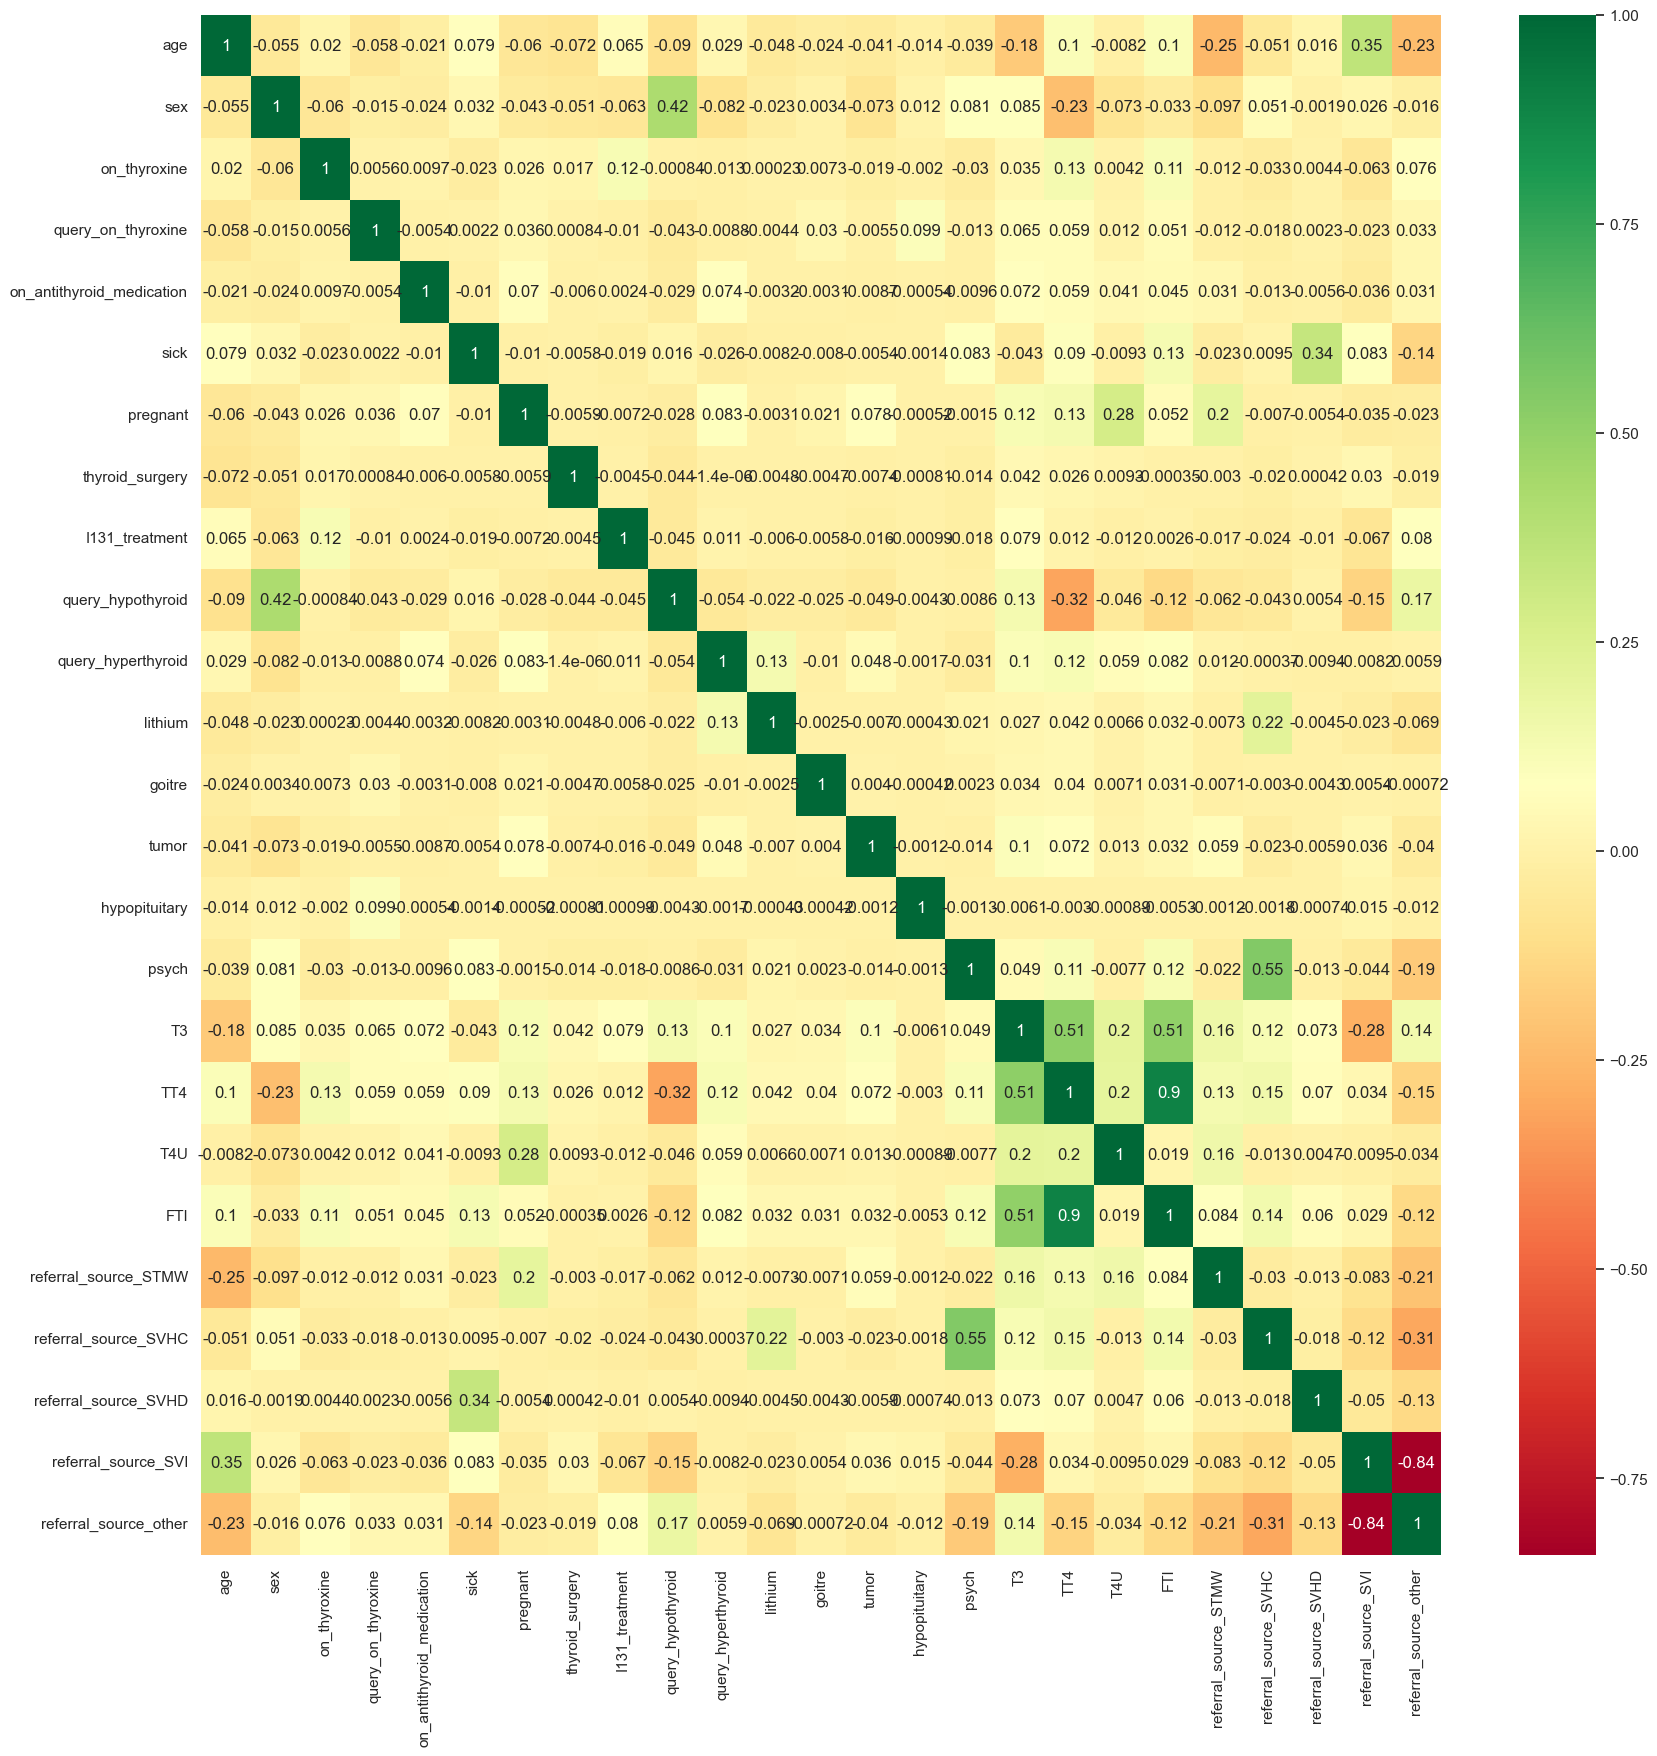

In [495]:
#same corealations can be seend on sampled data with out the target class 
#get correlations of each features in dataset
corrmat = x_sample.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sample[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The clustering of thyroid can be done considering different features. Here we trying to cluster different target Classes based on the sex and Recovery rate of indivisual country.

Checking the clusters

In [496]:
from sklearn.preprocessing import StandardScaler

X=combined_data[["TT4","FTI"]]

# Standard Scaling since K-Means Clustering is a distance based algorithm
std = StandardScaler()
X = std.fit_transform(X) 
X


array([[ 1.35319992,  0.91603954],
       [ 0.80158251,  0.88939694],
       [ 0.96946607,  1.20910821],
       ...,
       [-1.11708675, -0.46937598],
       [-1.11708675, -0.46937598],
       [-1.11708675, -0.46937598]])

In [497]:
'''from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
for i in range(1,7):#different cluster range 
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plot.plot(number_clusters,wcss)
plot.title('The Elbow title')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')'''

"from sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score,silhouette_samples\nwcss=[]\nfor i in range(1,7):#different cluster range \n  kmeans = KMeans(i)\n  kmeans.fit(X)\n  wcss_iter = kmeans.inertia_\n  wcss.append(wcss_iter)\n\nnumber_clusters = range(1,7)\nplot.plot(number_clusters,wcss)\nplot.title('The Elbow title')\nplot.xlabel('Number of clusters')\nplot.ylabel('WCSS')"

In [498]:
#using elbow method to dtetrminne the number of clusters and validating it through silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_    
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

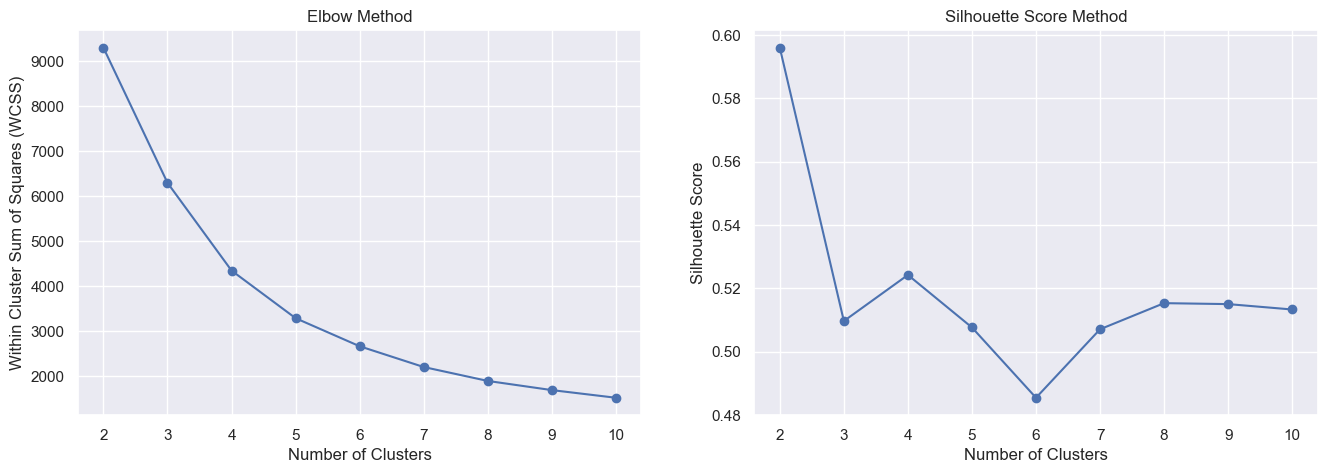

In [499]:
#silhouette_score to validate number of clusters are chosen correctly 
fig, (ax1, ax2) = plot.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

We can seefrom the elbow method results and silhoutte score methods it is good to go ahead with K = 4

In [500]:
clf_final=KMeans(n_clusters=2,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=2, random_state=6)

In [501]:
combined_data["Clusters"]=clf_final.predict(X)

<AxesSubplot:xlabel='TT4', ylabel='FTI'>

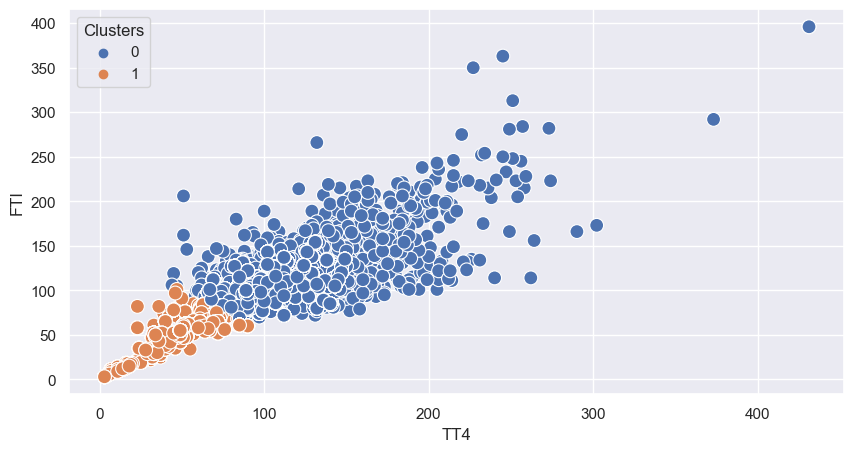

In [502]:
plot.figure(figsize=(10,5))
sns.scatterplot(x=combined_data["TT4"],y=combined_data["FTI"],hue=combined_data["Clusters"],s=100)

In [503]:
print("Few points in dataset belonging to Cluster 0: ",list(combined_data[combined_data["Clusters"]==0].head(10).index))
print("Few points in dataset belonging to Cluster 1: ",list(combined_data[combined_data["Clusters"]==1].head(10).index))

Few points in dataset belonging to Cluster 0:  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10]
Few points in dataset belonging to Cluster 1:  [4, 34, 40, 57, 62, 88, 89, 91, 113, 116]


Checking the VIF score for multicollinearity

In [504]:
def vif_score(x):
    scaler = StandardScaler() # performing scaling on data without output class 
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [505]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

def vif_score(x):
    scaler = StandardScaler() # performing scaling on data without output class
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr, i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [506]:
vif_score(x_sample)

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,FEATURE,VIF_SCORE
0,age,1.318105
1,sex,1.450756
2,on_thyroxine,1.058639
3,query_on_thyroxine,1.026138
4,on_antithyroid_medication,1.016733
5,sick,1.194877
6,pregnant,1.139930
7,thyroid_surgery,1.020801
8,I131_treatment,1.050018
9,query_hypothyroid,1.603107


We can see that the data has multicollinearity the features which are depicting that are referral_source_STMW, referral_source_SVHC, referral_source_SVHD referral_source_SVI, referral_source_other, TT4 and FTI so dropping the first four referral_source_STMW, referral_source_SVHC, referral_source_SVHD referral_source_SVI, TT4 and FTI for preventing multicollinearity

NOTE: here FTI and TT4 are the feature we performed clustering on but due to high VIF value i am dropping those (the dataset is small) and from the corelation matiex asfter drooping the feature TT4 anf FTI we can see that there ain't any features with positive corelation so here we can take advice from doctors to ask which are the prominent featrures as ooer them to perform our clustering in making the model better or we can include those two features without dropping with high VIF and then compute the results or drop them and compite the results (a discussion between client and supervisor is first required in these scenarios)

Here we have finally decided to dropped the columns to prevent multicollinearity.

In [507]:
x_sample.drop('referral_source_STMW', axis=1, inplace = True)

In [508]:
x_sample.drop('referral_source_SVHC', axis=1, inplace = True)

In [509]:
x_sample.drop('referral_source_SVHD', axis=1, inplace = True)

In [510]:
x_sample.drop('referral_source_SVI', axis=1, inplace = True)

In [511]:
x_sample.drop('TT4', axis=1, inplace = True)

In [512]:
x_sample.drop('FTI', axis=1, inplace = True)

In [513]:
x_sample

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,T4U,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0


In [514]:
# checking VIF score agian 
vif_score(x_sample)

,FEATURE,VIF_SCORE
0,age,1.129370
1,sex,1.269282
2,on_thyroxine,1.025565
3,query_on_thyroxine,1.023237
4,on_antithyroid_medication,1.016412
5,sick,1.029339
6,pregnant,1.108972
7,thyroid_surgery,1.014363
8,I131_treatment,1.040366
9,query_hypothyroid,1.293849


Now we can see that multicollinearity is not present in the data proceding ahead with training the model using different algorithms

<AxesSubplot:>

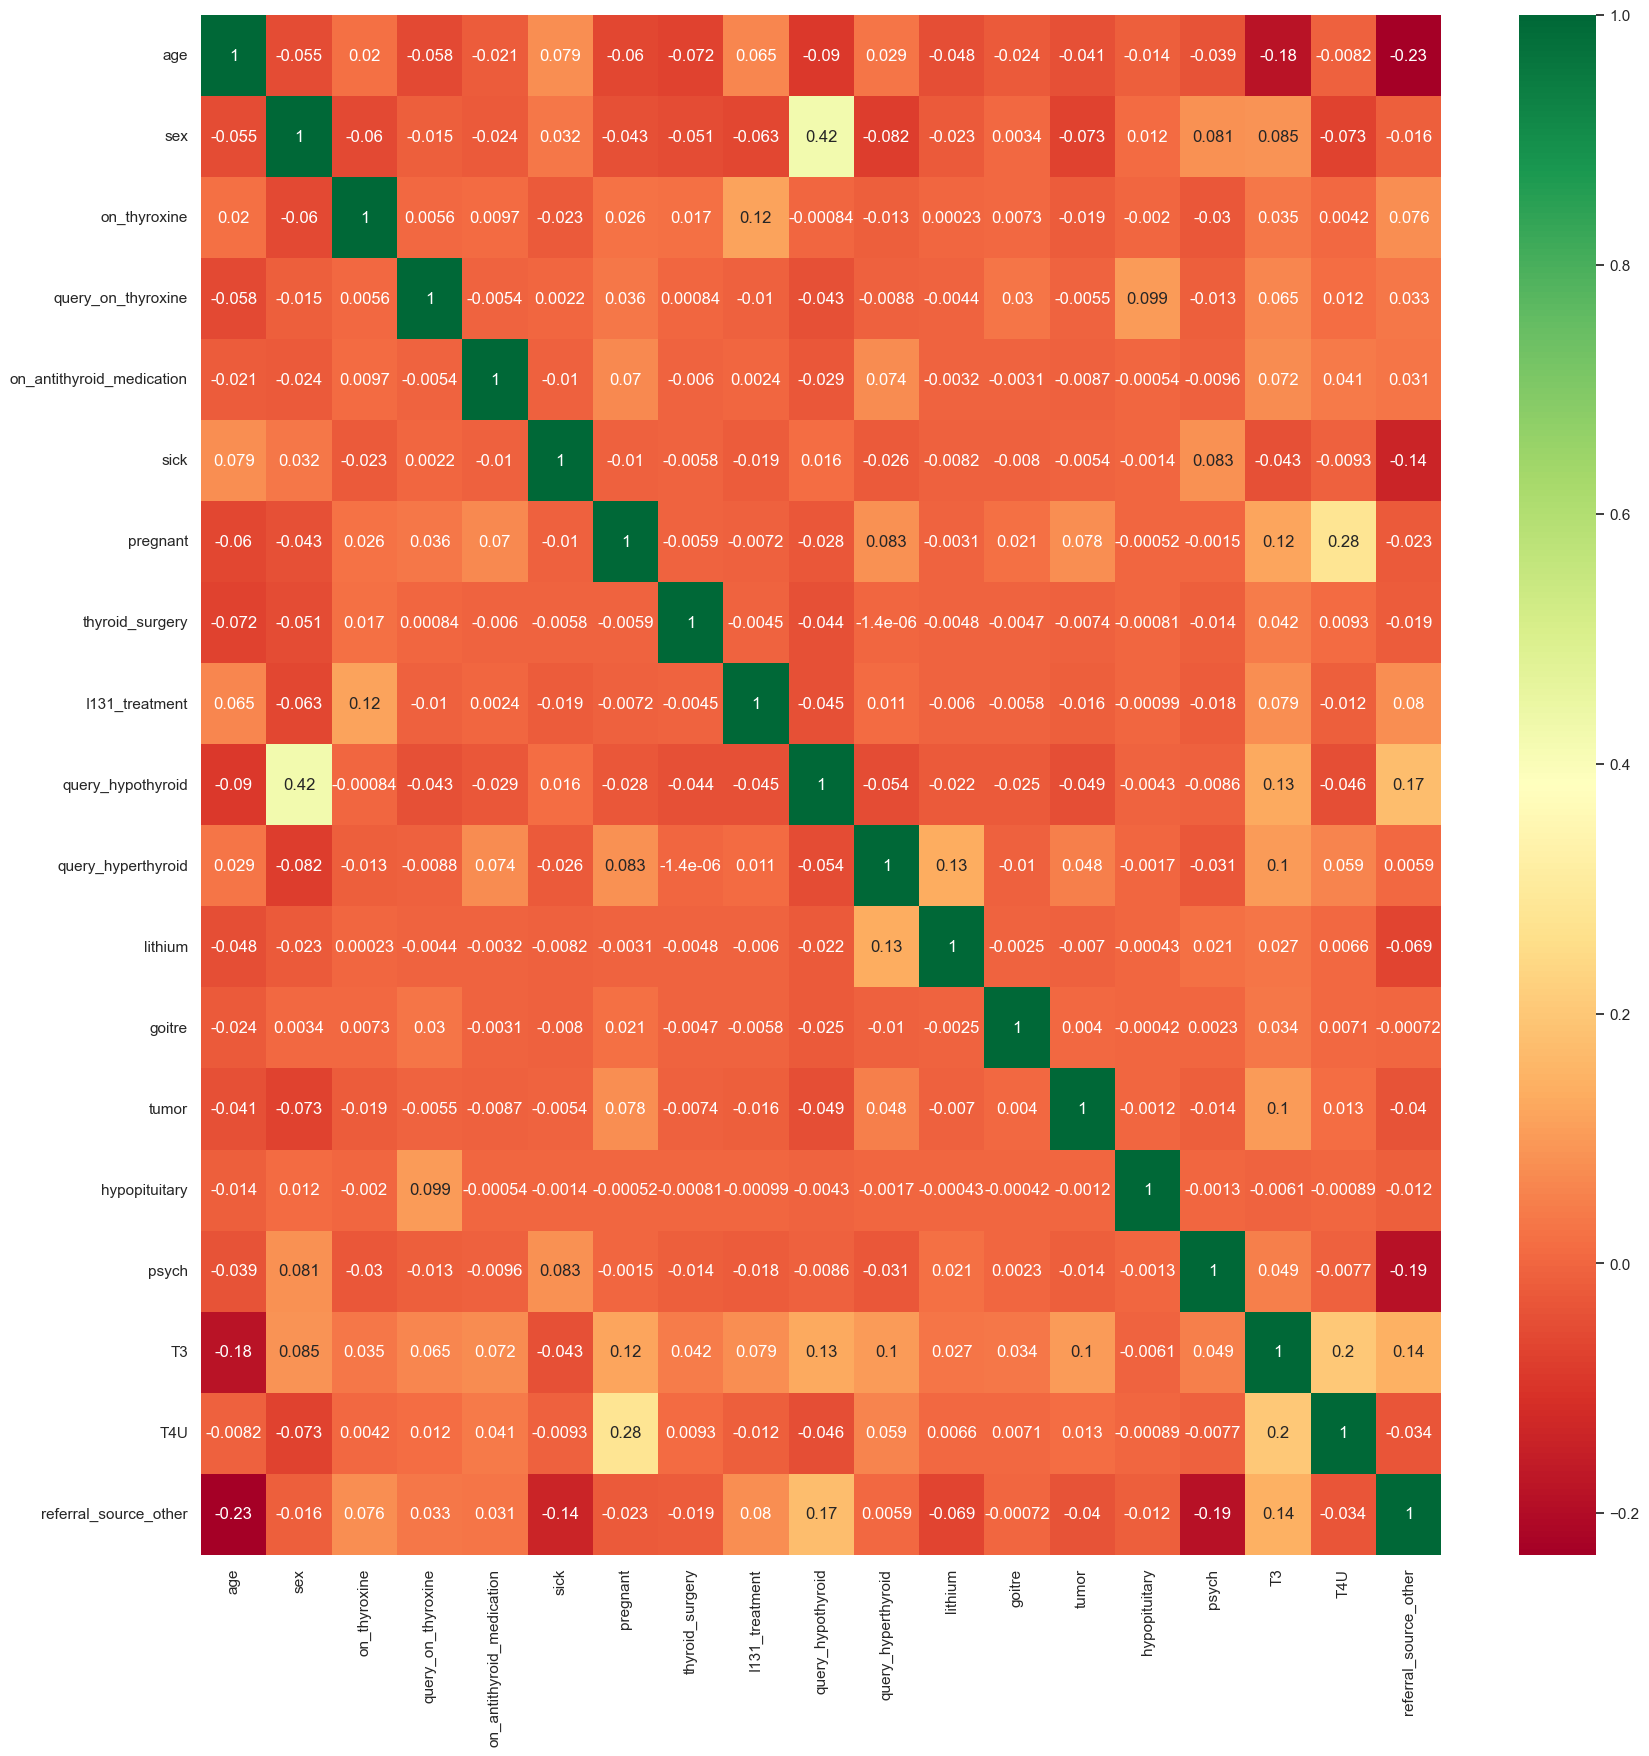

In [515]:
#same corealations can be seend on sampled data with out the target class 
#get correlations of each features in dataset
corrmat = x_sample.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sample[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Corss validating if there are any features we can use again for clustering but there ain't any good features as per problem statement to perform clustering

In [516]:
#scaling down the sampled data before it was done in function  
scalar = StandardScaler()
X_scale = scalar.fit_transform(x_sample)
X_scale

array([[-0.48370634, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507, -1.46855501],
       [-1.52938019, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       [-0.19324139,  1.4533423 , -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       ...,
       [-0.48370634,  1.4533423 , -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       [-0.48370634,  1.4533423 , -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       [-0.48370634,  1.4533423 , -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146]])

In [517]:
y_sample.unique()

array([1., 0., 2., 3.])

In [518]:
from sklearn.model_selection import train_test_split

# performing train test split
x_train, x_test, y_train, y_test = train_test_split(X_scale , y_sample , test_size = .20 , random_state = 144) #using 20% of data as test set


In [519]:
x_train

array([[-0.48370634,  1.4533423 , -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       [-0.19324139, -0.68806915, -0.24011012, ..., -0.71840744,
        -0.10449507,  0.68094146],
       [ 0.79433947,  1.4533423 , -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       ...,
       [-0.30942737,  1.4533423 , -0.24011012, ..., -0.71840744,
        -0.10449507, -1.46855501],
       [ 1.31717639, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146],
       [ 2.01429229, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507,  0.68094146]])

In [520]:
y_train

11915    3.0
10774    3.0
4853     0.0
4181     0.0
4964     0.0
        ... 
1446     1.0
7384     2.0
6010     0.0
1468     1.0
9575     2.0
Name: Class, Length: 11139, dtype: float64

In [521]:
x_test

array([[-1.00654327,  1.4533423 , -0.24011012, ..., -1.9408326 ,
        -0.10449507,  0.68094146],
       [ 1.43336237, -0.68806915, -0.24011012, ..., -0.71840744,
        -0.10449507, -1.46855501],
       [ 0.73624647, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507, -1.46855501],
       ...,
       [-0.19324139, -0.68806915, -0.24011012, ..., -0.71840744,
        -0.10449507,  0.68094146],
       [ 0.32959553, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507, -1.46855501],
       [-0.65798532, -0.68806915, -0.24011012, ...,  0.50401773,
        -0.10449507, -1.46855501]])

In [522]:
y_test

8668     2.0
4743     0.0
9412     2.0
705      1.0
6282     0.0
        ... 
209      1.0
12895    3.0
12708    3.0
4139     0.0
149      1.0
Name: Class, Length: 2785, dtype: float64

In [523]:
y_test

8668     2.0
4743     0.0
9412     2.0
705      1.0
6282     0.0
        ... 
209      1.0
12895    3.0
12708    3.0
4139     0.0
149      1.0
Name: Class, Length: 2785, dtype: float64

In [524]:
x_test[0]

array([-1.00654327,  1.4533423 , -0.24011012, -0.08547902, -0.06354584,
       -0.16198212, -0.0618136 , -0.09517682, -0.11699001, -0.50260208,
       -0.20413178, -0.05091332, -0.04947529, -0.13740076, -0.00847488,
       -0.15164467, -1.9408326 , -0.10449507,  0.68094146])

# Implementation of Selected Model

# logistic Regression Classifier

In [525]:
from sklearn.linear_model import LogisticRegression

logisticregression_liblinear = LogisticRegression(verbose=1, solver='liblinear')


In [526]:
logisticregression_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [527]:
logisticregression_liblinear.predict(x_test)

array([3., 2., 1., ..., 3., 1., 1.])

In [528]:
logisticregression_liblinear.predict([x_test[1]])

array([2.])

In [529]:
logisticregression_liblinear.predict_log_proba([x_test[1]])

array([[-1.07060242, -3.10182691, -0.50166659, -5.00409419]])

In [530]:
y_pred_liblinear_probility = logisticregression_liblinear.predict_log_proba(x_test)
y_pred_liblinear_probility

array([[-3.27340228e+00, -4.32013468e+00, -7.60994150e-01,
        -7.30593957e-01],
       [-1.07060242e+00, -3.10182691e+00, -5.01666591e-01,
        -5.00409419e+00],
       [-9.16592084e-01, -8.07750057e-01, -1.86984522e+00,
        -9.08896134e+00],
       ...,
       [-1.58948683e+00, -2.57915634e+00, -1.06575069e+00,
        -9.79063917e-01],
       [-9.33776259e-01, -8.50507764e-01, -1.71699151e+00,
        -8.94968476e+00],
       [-6.87722488e+00, -2.10529644e-03, -6.83934568e+00,
        -1.35711469e+01]])

In [531]:
y_test.iloc[1]

0.0

In [532]:
y_pred_liblinear = logisticregression_liblinear.predict(x_test)
y_pred_liblinear

array([3., 2., 1., ..., 3., 1., 1.])

[[298 212 104  94]
 [194 391  93  34]
 [ 61  62 388 142]
 [  0   0   0 712]]


C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


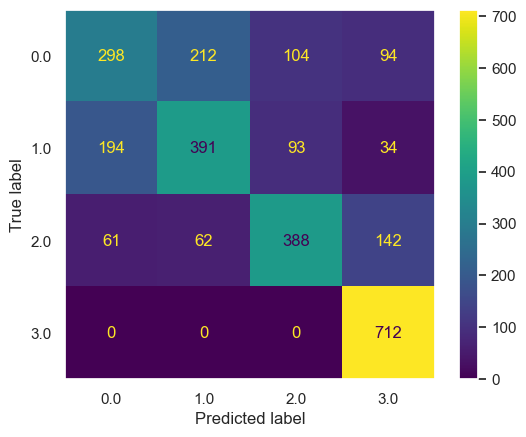

In [533]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# confusion_matrix function a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred_liblinear))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(logisticregression_liblinear, x_test, y_test)
plt.grid(False)
plt.show()


In [534]:
# Calculating accuracy, precision, recall, and F1 score for the Logistric regression Classifier
accuracy_LR = accuracy_score(y_test, y_pred_liblinear)
precision_LR = precision_score(y_test, y_pred_liblinear, average='macro')
recall_LR = recall_score(y_test, y_pred_liblinear, average='macro')
f1_LR = f1_score(y_test, y_pred_liblinear, average='macro')

accuracy_LR,precision_LR,recall_LR,f1_LR

(0.6423698384201078, 0.6287868868082873, 0.6410604906535219, 0.62699334372186)

In [535]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test,y_pred_liblinear)


0.7608307024829255

In [536]:
auc = multiclass_roc_auc_score(y_test,y_pred_liblinear)

In [537]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds  = roc_curve(y_test, y_pred_liblinear, pos_label=0)


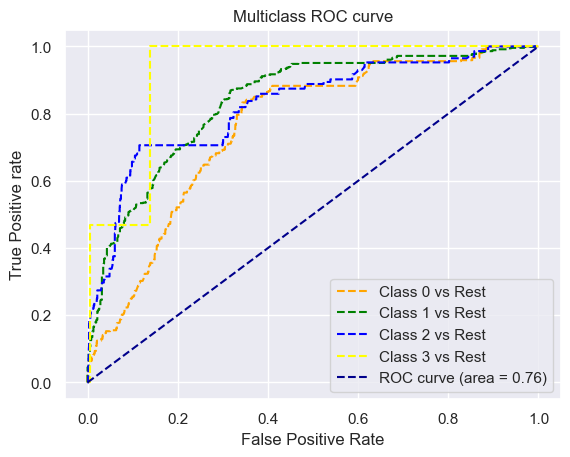

In [579]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_liblinear_probility[:,i], pos_label= i)
    
# plotting    
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);   

#  Support Vector Classifer

In [539]:
from sklearn.svm import SVC  
SVC_clf = SVC(kernel='linear',gamma='auto', probability=True) 
SVC_clf.fit(x_train,y_train )

SVC(gamma='auto', kernel='linear', probability=True)

In [540]:
y_pred_SVC_probility = SVC_clf.predict_proba(x_test)
y_pred_SVC_probility

array([[3.66574457e-02, 1.89854749e-02, 7.60078240e-01, 1.84278839e-01],
       [2.84899935e-01, 1.79709629e-01, 5.34405610e-01, 9.84826368e-04],
       [3.95659350e-01, 4.36960914e-01, 1.67071343e-01, 3.08392779e-04],
       ...,
       [9.21461343e-02, 4.18071414e-02, 2.19079595e-01, 6.46967129e-01],
       [3.95619080e-01, 4.36953554e-01, 1.67068068e-01, 3.59297372e-04],
       [3.20860603e-02, 9.24663796e-01, 4.28607359e-02, 3.89407545e-04]])

In [541]:
y_pred_SVC = SVC_clf.predict(x_test)
y_pred_SVC

array([2., 2., 0., ..., 3., 0., 1.])

[[410 140 129  29]
 [277 322 105   8]
 [106  56 423  68]
 [  0   0   0 712]]


C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


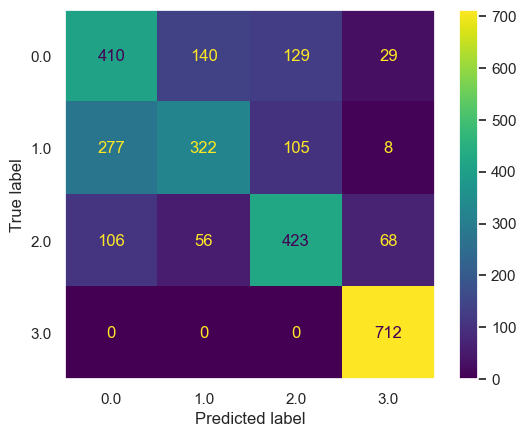

In [542]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred_SVC))


# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(SVC_clf, x_test, y_test)
plot.grid(False)
plot.show()

In [543]:
# Calculating accuracy, precision, recall, and F1 score for the Logistric regression Classifier
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC, average='macro')
recall_SVC = recall_score(y_test, y_pred_SVC, average='macro')
f1_SVC = f1_score(y_test, y_pred_SVC, average='macro')

accuracy_LR,precision_SVC,recall_SVC,f1_SVC

(0.6423698384201078,
 0.6634905564646658,
 0.6697806788837908,
 0.6617522231634618)

In [544]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_SVC)

0.7799707309075926

In [545]:
auc2 = multiclass_roc_auc_score(y_test,y_pred_SVC)
auc2

0.7799707309075926

In [546]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_SVC, pos_label= 0)

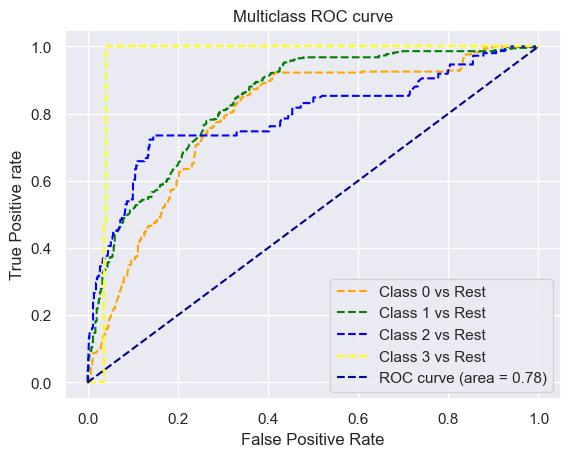

In [547]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_SVC_probility[:,i], pos_label= i)
    
# plotting    
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc2)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);    

# Naive bayes

In [548]:
from sklearn.naive_bayes import GaussianNB

# Creating a Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Fitting the model to the training data
gnb_model.fit(x_train, y_train)

# Checking the training accuracy
training_accuracy = gnb_model.score(x_train, y_train)
training_accuracy

0.4375617200825927

In [549]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting the target variable for the test data
y_pred = gnb_model.predict(x_test)

# Calculating the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

test_accuracy, conf_matrix

(0.4391382405745063,
 array([[ 74,   2, 331, 301],
        [ 69,  33, 395, 215],
        [  0,   0, 404, 249],
        [  0,   0,   0, 712]], dtype=int64))

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


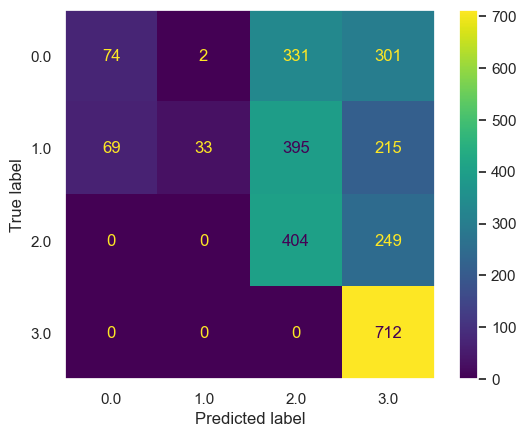

In [550]:
# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(gnb_model, x_test, y_test)
plot.grid(False)
plot.show()

In [551]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculating precision, recall, and F1 score for the test data
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

precision, recall, f1


(0.5749800025918803, 0.4423877725373586, 0.34149015694426377)

In [552]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizing the labels to calculate multiclass ROC-AUC score
y_test_binarized = label_binarize(y_test, classes=combined_data['Class'].unique())
y_pred_proba = gnb_model.predict_proba(x_test)

# Calculating the multiclass ROC-AUC score using the One-vs-All method
multiclass_roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
multiclass_roc_auc


0.7217841800858449

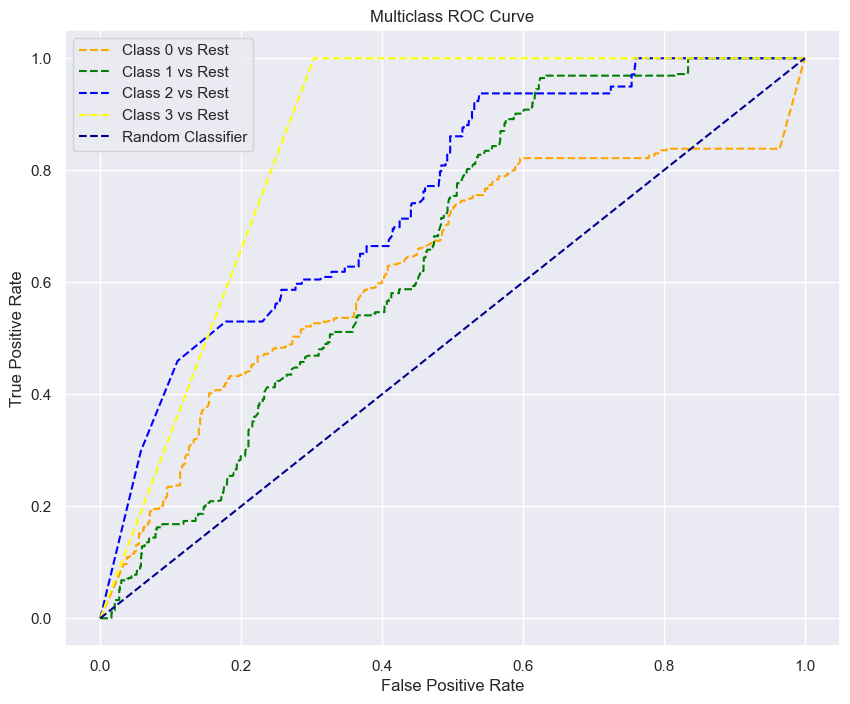

In [553]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Number of classes
n_class = len(combined_data['Class'].unique())

# Initializing dictionaries for False Positive Rate, True Positive Rate, and Threshold
fpr = {}
tpr = {}
thresh ={}

# Calculating FPR, TPR, and Threshold for each class
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])

# Plotting ROC curves for each class
plt.figure(figsize=(10, 8))
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--', color='yellow', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Classifier')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


# Classification Tree

In [554]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fitting the model to the training data
dt_model.fit(x_train, y_train)

# Predicting the target variable for the test data (probabilities)
y_pred_dt_prob = dt_model.predict_proba(x_test)

# Checking the training accuracy
training_accuracy_dt = dt_model.score(x_train, y_train)
training_accuracy_dt


0.9351826914444744

In [555]:
# Predicting the target variable for the test data (probabilities)
y_pred_dt_prob = dt_model.predict_proba(x_test)

# Converting probabilities to predicted classes by taking the class with the highest probability
y_pred_dt_classes = y_pred_dt_prob.argmax(axis=1)

# Calculating the confusion matrix for the Decision Tree Classifier using predicted classes
conf_matrix_dt_with_prob = confusion_matrix(y_test, y_pred_dt_classes)

# Displaying the confusion matrix
conf_matrix_dt_with_prob


array([[644,  11,  53,   0],
       [139, 528,  45,   0],
       [  6,   0, 647,   0],
       [  0,   0,   0, 712]], dtype=int64)

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


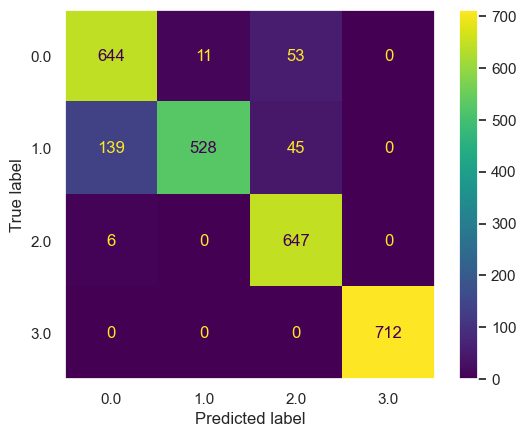

In [556]:
# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(dt_model, x_test, y_test)
plot.grid(False)
plot.show()

In [557]:
# Predicting the target variable for the test data (class labels)
y_pred_dt = dt_model.predict(x_test)

# Calculating accuracy, precision, recall, and F1 score for the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Calculating the multiclass ROC-AUC score using the One-vs-All method
multiclass_roc_auc_dt = roc_auc_score(y_test_binarized, y_pred_dt_proba, multi_class='ovr')

accuracy_dt, precision_dt, recall_dt, f1_dt, multiclass_roc_auc_dt


(0.9087971274685817,
 0.9160678199368144,
 0.9104972980182486,
 0.9075300383086239,
 0.722070838520133)

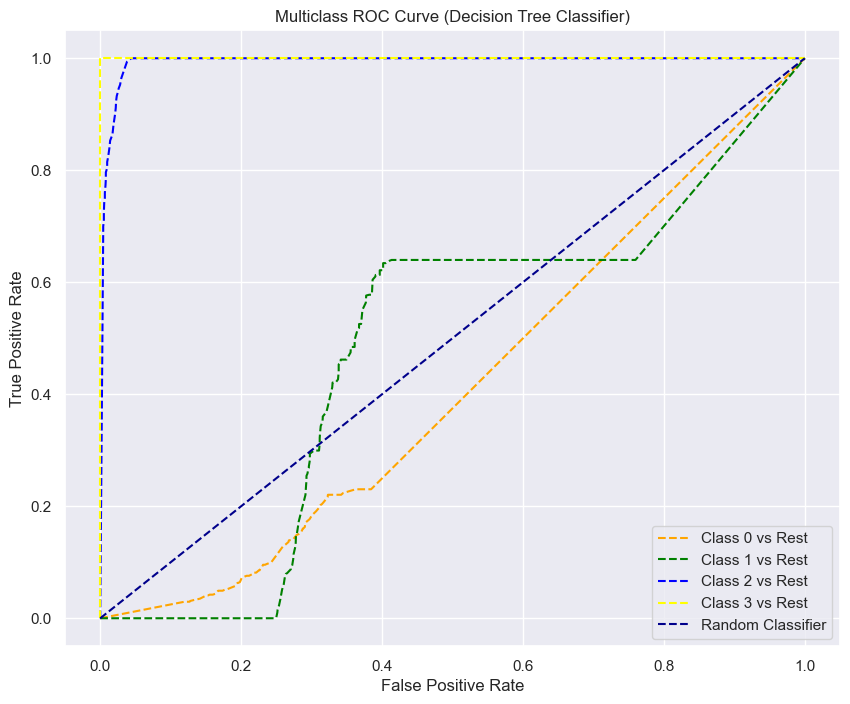

In [558]:
# Calculating FPR, TPR, and Threshold for each class for the Decision Tree Classifier
fpr_dt = {}
tpr_dt = {}
thresh_dt ={}
for i in range(n_class):    
    fpr_dt[i], tpr_dt[i], thresh_dt[i] = roc_curve(y_test_binarized[:, i], y_pred_dt_proba[:, i])

# Plotting ROC curves for each class
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt[0], tpr_dt[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr_dt[1], tpr_dt[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.plot(fpr_dt[2], tpr_dt[2], linestyle='--', color='blue', label='Class 2 vs Rest')
plt.plot(fpr_dt[3], tpr_dt[3], linestyle='--', color='yellow', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Classifier')
plt.title('Multiclass ROC Curve (Decision Tree Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()



# Neural Networks

In [559]:
from sklearn.neural_network import MLPClassifier

# Creating an MLP Classifier
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Fitting the model to the training data
mlp_model.fit(x_train, y_train)

# Predicting the target variable for the test data
y_pred_mlp = mlp_model.predict(x_test)

# Checking the training accuracy
training_accuracy_mlp = mlp_model.score(x_train, y_train)

training_accuracy_mlp


0.8262860220845677

In [560]:
# Calculating accuracy, precision, recall, and F1 score for the Decision Tree Classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='macro')
recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')

accuracy_dt, precision_dt, recall_dt, f1_dt

(0.9087971274685817,
 0.9160678199368144,
 0.9104972980182486,
 0.9075300383086239)

In [561]:
# Calculating the confusion matrix for the MLP Classifier
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
conf_matrix_mlp

array([[488, 132,  88,   0],
       [178, 458,  75,   1],
       [ 44,   8, 601,   0],
       [  0,   0,   0, 712]], dtype=int64)

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


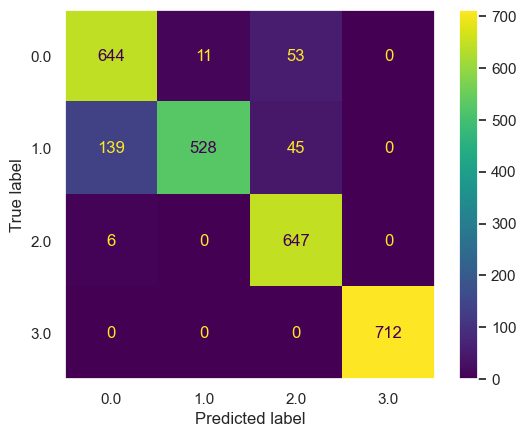

In [562]:
# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(dt_model, x_test, y_test)
plot.grid(False)
plot.show()

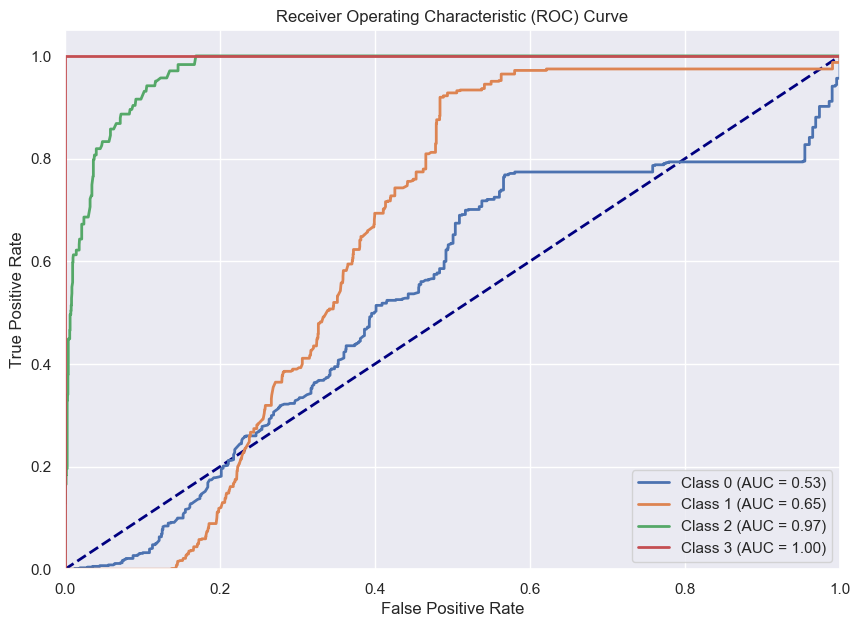

0.8453151715772385

In [563]:
from sklearn.metrics import auc as sklearn_auc

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output (One-vs-All)
y_test_binarized = label_binarize(y_test, classes=combined_data['Class'].unique())
y_pred_prob_binarized = mlp_model.predict_proba(x_test_scaled)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Iterate through each class and plot the ROC curve
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_binarized[:, i])
    roc_auc = sklearn_auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.legend(loc="lower right")
plt.show()

# Calculate the micro-average ROC AUC
roc_auc_micro = roc_auc_score(y_test_binarized, y_pred_prob_binarized, average='micro')
roc_auc_micro


# LDA

In [564]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into features (X) and target (y)
x = combined_data.drop(columns=['Class'])
y = combined_data['Class']


# Creating and fitting the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

# Predicting the classes on the test set
y_pred = lda.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


accuracy


0.5346499102333931

In [565]:
classification_rep = classification_report(y_test, y_pred)
classification_rep

'              precision    recall  f1-score   support\n\n         0.0       0.53      0.47      0.50       708\n         1.0       0.62      0.52      0.56       712\n         2.0       0.44      0.69      0.54       653\n         3.0       0.63      0.47      0.54       712\n\n    accuracy                           0.53      2785\n   macro avg       0.55      0.54      0.53      2785\nweighted avg       0.56      0.53      0.53      2785\n'

# K Nearest Neighbor Classifier

In [566]:
from sklearn.neighbors import KNeighborsClassifier  
classifier_KNN= KNeighborsClassifier(n_neighbors=5, metric='manhattan', p=2 )  
classifier_KNN.fit(x_train, y_train) 

KNeighborsClassifier(metric='manhattan')

In [567]:
y_pred_classifier_KNN = classifier_KNN.predict(x_test)  
y_pred_classifier_KNN

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2., 0., 2., ..., 3., 0., 1.])

In [568]:
classifier_KNN.score(x_train, y_train)

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9069934464494119

In [569]:
classifier_KNN.score(x_test, y_test)

C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8879712746858168

In [570]:
y_pred_Prob_classifier_KNN = classifier_KNN.predict_proba(x_test)  
y_pred_Prob_classifier_KNN

array([[0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       ...,
       [0. , 0. , 0. , 1. ],
       [0.8, 0.2, 0. , 0. ],
       [0. , 1. , 0. , 0. ]])

[[623  46  39   0]
 [148 500  61   3]
 [  9   6 638   0]
 [  0   0   0 712]]


C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


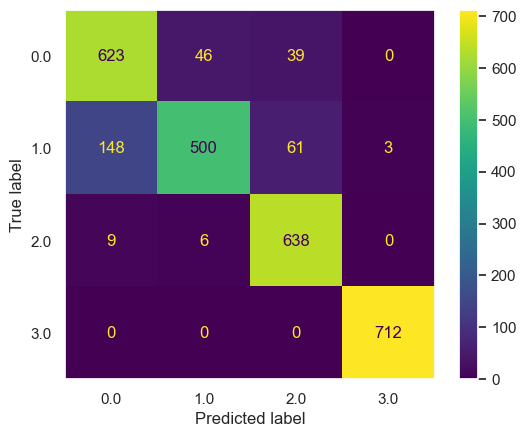

In [571]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred_classifier_KNN))

# plotting confusion_matrix
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
plot_confusion_matrix(IC, y_pred_classifier_KNN, y_test); #normalize='true', values_format='.2%'
plot.grid(False)
plot.show()

In [572]:
import numpy as np

# Convert predicted probabilities to class labels
y_pred_labels_KNN = np.argmax(y_pred_Prob_classifier_KNN, axis=1)

# Now calculate the metrics
accuracy_KNN = accuracy_score(y_test, y_pred_labels_KNN)
precision_KNN = precision_score(y_test, y_pred_labels_KNN, average='macro')
recall_KNN = recall_score(y_test, y_pred_labels_KNN, average='macro')
f1_KNN = f1_score(y_test, y_pred_labels_KNN, average='macro')

accuracy_KNN, precision_KNN, recall_KNN, f1_KNN


(0.8879712746858168,
 0.8912044727394675,
 0.8898049475784724,
 0.8859320460873992)

In [573]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classifier_KNN))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       708
         1.0       0.91      0.70      0.79       712
         2.0       0.86      0.98      0.92       653
         3.0       1.00      1.00      1.00       712

    accuracy                           0.89      2785
   macro avg       0.89      0.89      0.89      2785
weighted avg       0.89      0.89      0.89      2785



0.9262742606783163

In [574]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)

0.9262742606783163

In [575]:
auc3 = multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)
auc3

0.9262742606783163

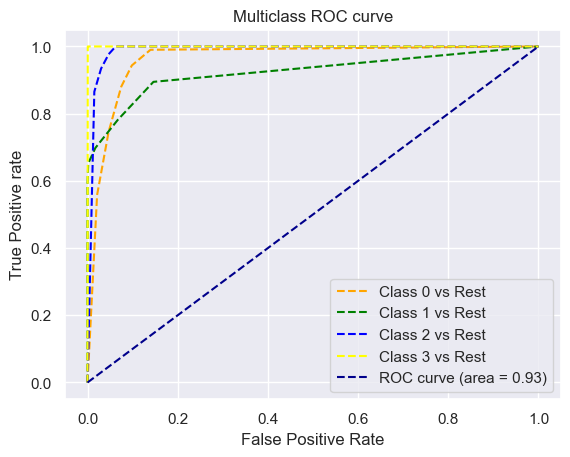

In [576]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_classifier_KNN, pos_label= 0)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_Prob_classifier_KNN[:,i], pos_label= i)
    
# plotting    
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc3)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);    

# Decile Lift Chart

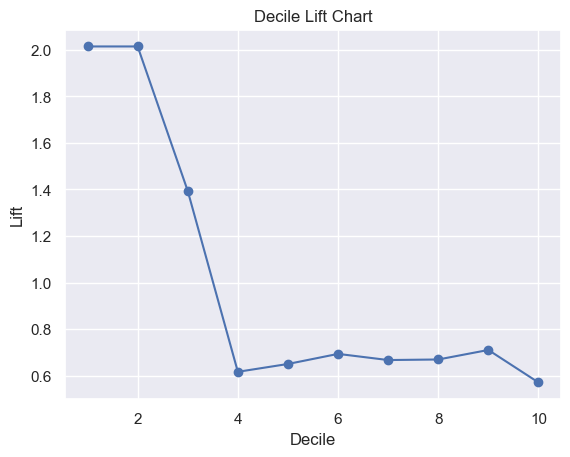

In [580]:
# Function to calculate decile lift
def calculate_lift(y_true, y_pred_prob):
    # Combining true labels and predicted probabilities
    data = list(zip(y_true, y_pred_prob))
    
    # Sorting by predicted probability
    data.sort(key=lambda x: x[1], reverse=True)
    
    # Dividing data into deciles
    deciles = np.array_split(data, 10)
    
    # Calculating lift for each decile
    lifts = []
    for decile in deciles:
        actual_positives = sum([x[0] for x in decile])
        expected_positives = sum([x[0] for x in data]) / 10
        lift = actual_positives / expected_positives
        lifts.append(lift)
        
    return lifts

# Calculating lift for the positive class (assuming it's the last column in y_pred_Prob_classifier_KNN)
lifts = calculate_lift(y_test, y_pred_Prob_classifier_KNN[:, -1])

# Plotting the decile lift chart
plt.plot(range(1, 11), lifts, marker='o')
plt.title('Decile Lift Chart')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


# hyperparmeters

The best result was found in case of KNN classfier and it was furter hypertuned using the hyperparmeters gridsearchCV

In [578]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create KNN classifier
knn = KNeighborsClassifier()

#  Use GridSearchCV
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)

#  Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Evaluate the model before and after hyperparameter tuning

score_after_tuning = grid_search.score(x_test, y_test)

# Compare the results
print("Score before tuning:", accuracy_score(y_test, y_pred_classifier_KNN))
print("Score after tuning:", score_after_tuning)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
Score before tuning: 0.8879712746858168
Score after tuning: 0.8897666068222622


C:\Users\Dinesh Chalicheemala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 Hyperparameter tuning like GridsearchCV is used to improve the accuracy of the model from 88.7 to 90.4

# Result

The best result was found in case of KNN classfier and it was furter hypertuned using the hyperparmeters like gridserchCV and the accuracy came out to be 0.9044883303411131 in that case